In [93]:
import glob
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers,optimizers,datasets,Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [94]:
path = "./flower_photos/"
w = 10 #设置图片宽度为10
h = 10 #设置图片高度为10
#c = 3

In [95]:
def read_img(path):
    cate = [path+x for x in os.listdir(path)] #对path下的文件夹进行遍历
    imgs = []
    labels = []
    for idx,folder in enumerate(cate):  #enumerate函数是将一个可遍历的数据对象组合为一个索引序列，同时列出数据
        for im in glob.glob(folder+'/*.jpg'): #利用glob.glob来遍历每个层级文件中jpg格式的图片
            # print('reading the images:%s'%(im)) #打印图片的路径＋名称的信息
            img= cv2.imread(im)
            img = cv2.resize(img,(w,h))
            imgs.append(img)
            labels.append(idx) #idx就是每一张图的数据标签，因为第一个文件夹是第0类，然后是第一类，第二类，以此类推
    return np.array(imgs,np.float32),np.array(labels,np.int32)   #把list转为np.array

In [96]:
data,label = read_img(path)
print("shape of data:", data.shape)
print("shape of label:",label.shape)
print(label)

shape of data: (516, 10, 10, 3)
shape of label: (516,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

In [97]:
seed = 109
np.random.seed(seed)

(x_train, x_val, y_train, y_val) = train_test_split(data,label,test_size=0.20,random_state=seed)
x_train = x_train/255 #进行标准化
x_val = x_val/255

flower_dict = {0:'bee',1:'blackberry',2:'blanket',3:'bougainvillea',4:'bromelia',5:'foxglove'} #创建图像标签列表


In [98]:
model = Sequential([
    layers.Conv2D(32,kernel_size=[5,5],padding="same",activation=tf.nn.relu),#卷积层,32是卷积核的数量
    layers.MaxPool2D(pool_size = [2,2],strides = 2,padding = 'same'),#池化层
    layers.Dropout(0,25),

    layers.Conv2D(64,kernel_size=[3,3],padding="same",activation=tf.nn.relu),#卷积层,32是卷积核的数量
    layers.MaxPool2D(pool_size = [2,2],strides = 2,padding = 'same'),#池化层
    layers.Dropout(0,25),

    layers.Conv2D(128,kernel_size=[3,3],padding="same",activation=tf.nn.relu),#卷积层,32是卷积核的数量
    layers.MaxPool2D(pool_size = [2,2],strides = 2,padding = 'same'),#池化层
    layers.Dropout(0,25),

    layers.Conv2D(256,kernel_size=[3,3],padding="same",activation=tf.nn.relu),#卷积层,32是卷积核的数量
    layers.MaxPool2D(pool_size = [2,2],strides = 2,padding = 'same'),#池化层
    layers.Dropout(0,25),


    layers.Flatten(),#压缩为1维的数据
    layers.Dense(512,activation=tf.nn.relu),    #全连接层
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(6,activation='softmax'),
]
)

In [99]:
opt = optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
#训练模型，决定训练集和验证集，batchsize：进行梯度下降训练模型时每个batch的样本数
#verbose:日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
from time import * #记录运行时间
begin_time = time()

#Todo 可调节超参数batchsize
model.fit(x_train,y_train,epochs = 500, validation_data = (x_val,y_val),batch_size=200,verbose = 2)

model.summary()#输出模型的关键信息，结构和参数量若没有定义好模型或者参数有问题，则会报错
end_time = time()
run_time = end_time - begin_time
print("实际运行时长：", run_time)

Epoch 1/500
3/3 - 1s - loss: 1.7946 - accuracy: 0.0947 - val_loss: 1.7720 - val_accuracy: 0.3173 - 1s/epoch - 496ms/step
Epoch 2/500
3/3 - 0s - loss: 1.7699 - accuracy: 0.3131 - val_loss: 1.7538 - val_accuracy: 0.3173 - 114ms/epoch - 38ms/step
Epoch 3/500
3/3 - 0s - loss: 1.7521 - accuracy: 0.3131 - val_loss: 1.7365 - val_accuracy: 0.3173 - 110ms/epoch - 37ms/step
Epoch 4/500
3/3 - 0s - loss: 1.7333 - accuracy: 0.3131 - val_loss: 1.7180 - val_accuracy: 0.3173 - 113ms/epoch - 38ms/step
Epoch 5/500
3/3 - 0s - loss: 1.7131 - accuracy: 0.3131 - val_loss: 1.6973 - val_accuracy: 0.3173 - 101ms/epoch - 34ms/step
Epoch 6/500
3/3 - 0s - loss: 1.6911 - accuracy: 0.3131 - val_loss: 1.6795 - val_accuracy: 0.3173 - 99ms/epoch - 33ms/step
Epoch 7/500
3/3 - 0s - loss: 1.6734 - accuracy: 0.3131 - val_loss: 1.6673 - val_accuracy: 0.3173 - 99ms/epoch - 33ms/step
Epoch 8/500
3/3 - 0s - loss: 1.6592 - accuracy: 0.3131 - val_loss: 1.6599 - val_accuracy: 0.3173 - 99ms/epoch - 33ms/step
Epoch 9/500
3/3 - 0s 

In [101]:
test_loss,test_acc = model.evaluate(x_val,y_val,verbose = 2)
print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 1.4288 - accuracy: 0.5865 - 37ms/epoch - 9ms/step

Test accuracy: 0.5865384340286255


In [102]:
model.save('model/flower_model.h5')
path_test = './TestImages/'

In [103]:
#加载训练集数据
path_test = './TestImages/'
imgs = []
for im in glob.glob(path_test+'/*.jpg'):
    # print('reading the images:%s'%(im))
    img = cv2.imread(im)
    img = cv2.resize(img,(w,h))
    imgs.append(img)
imgs = np.array(imgs,np.float32)
print("shape of data:",imgs.shape)

shape of data: (6, 10, 10, 3)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 10, 10, 32)        2432      
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 conv2d_39 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 3, 3, 64)         

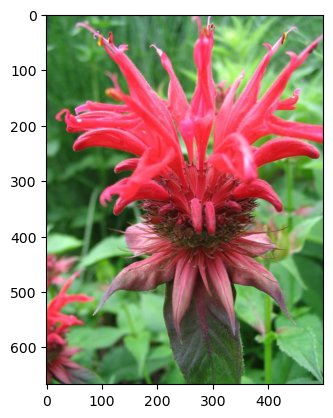

第 2 朵花预测:blackberry


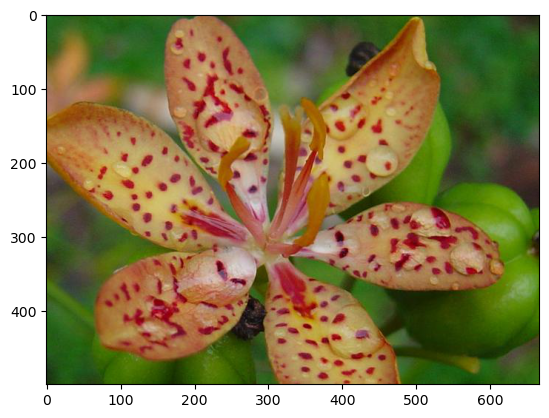

第 3 朵花预测:blanket


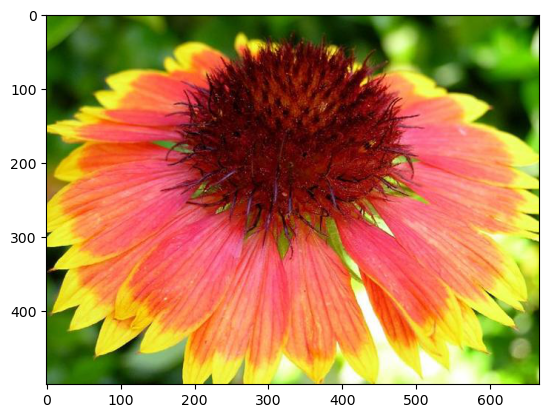

第 4 朵花预测:bougainvillea


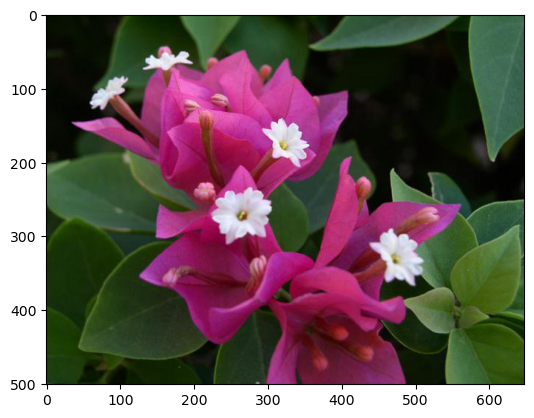

第 5 朵花预测:bromelia


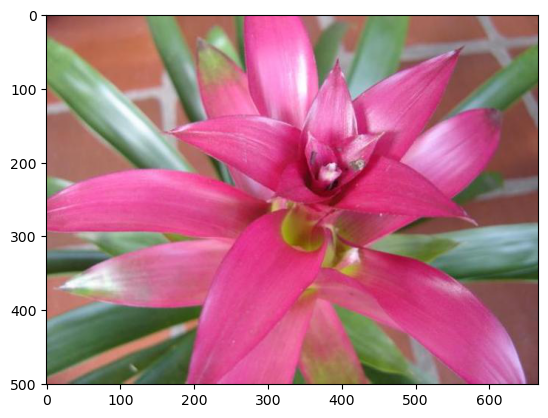

第 6 朵花预测:foxglove


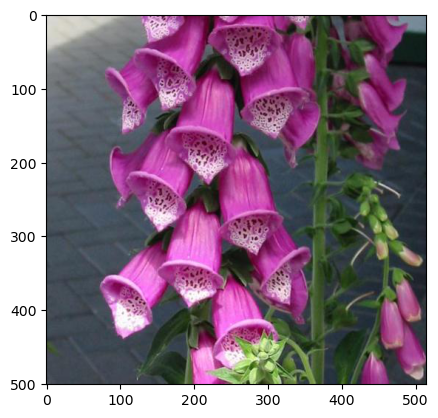

In [104]:
from tensorflow import keras
application_model = keras.models.load_model('model/flower_model.h5')
application_model.summary()

predict_x = model.predict(imgs)
preidiction = np.argmax(predict_x,axis = 1)

#绘制预测图象
for i in range(np.size(preidiction)):
    print("第",i+1,"朵花预测:"+flower_dict[preidiction[i]])
    img= plt.imread(path_test+"test"+str(i+1)+".jpg")
    plt.imshow(img)
    plt.show()